In [2]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import helper as hlp
from bb_binary import FrameContainer, Repository, load_frame_container

In [3]:
%matplotlib inline

In [13]:
path = "../00_Data/testset_2015_20m/2015082215/"
path = "../00_Data/testset_2015_20m/2015092215/"
path = "../00_Data/testset_2015_20m/2015102215/"

In [14]:
files = hlp.get_files(path)

In [17]:
tfile = files[0]

In [18]:
tfile

array([ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_3_2015-10-22T15:19:13.826157Z--2015-10-22T15:24:54.840662Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_1_2015-10-22T15:19:15.567256Z--2015-10-22T15:24:56.583761Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_2_2015-10-22T15:19:17.353358Z--2015-10-22T15:24:58.370863Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_0_2015-10-22T15:19:17.862387Z--2015-10-22T15:24:58.880892Z.bbb'], 
      dtype='<U150')

In [8]:
df3 = prep.get_dataframe2(load_frame_container(tfile[0]))
df0 = prep.get_dataframe2(load_frame_container(tfile[1]))
df2 = prep.get_dataframe2(load_frame_container(tfile[2]))
df1 = prep.get_dataframe2(load_frame_container(tfile[3]))

In [9]:
c = 0.95

In [10]:
df3 = prep.calcIds(df3,c)
df0 = prep.calcIds(df0,c)
df2 = prep.calcIds(df2,c)
df1 = prep.calcIds(df1,c)

In [11]:
# cam 0 und cam1 nach rechts verschieben
df0.xpos = df0.xpos + 3000
df1.xpos = df1.xpos + 3000

In [12]:
# Seiten zusammenfugen
side0 = pd.concat([df3, df0])
side1 = pd.concat([df2, df1])

In [13]:
def coloring(value):
    retval = 'k'
    if(value.dup):
        retval = 'r'    
    return retval

In [17]:
def plotSides(frame, s):
    s = s[s.frame_idx == frame]
    s = s.assign(dup=s.duplicated('id', keep=False))
    s = s.assign(color=s.apply(coloring, axis=1))
    axes = s.plot.scatter(x='xpos',
                          y='ypos',
                          xlim=(0,6000),
                          ylim=(0,4000),
                          s=20,
                          c=s.color,
                          alpha=0.5)
    axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

# Plot einer Wabenseite (Duplikate in Rot) pro Frame

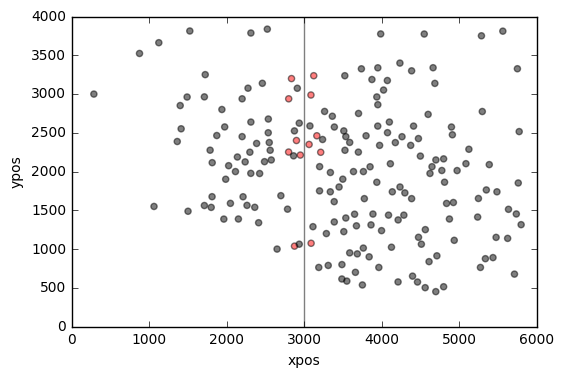

In [56]:
plotSides(28,side0)

# Duplikate Heatmap pro Seite

In [113]:
gr = side1.groupby(by='frame_idx')

In [114]:
dup = []
for name, group in gr:
    dup.append(group[group.duplicated('id', keep=False)])

In [115]:
data = pd.concat(dup)

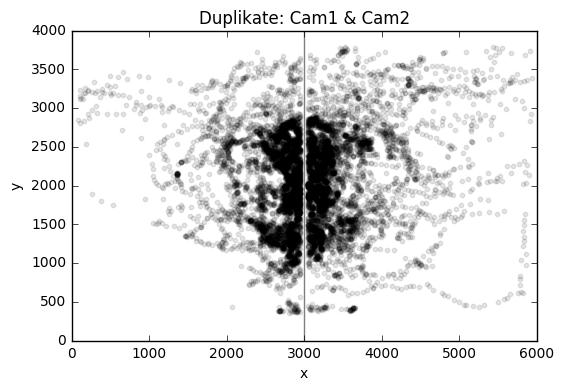

In [116]:
axes = data.plot.scatter(x='xpos',
                          y='ypos',
                          xlim=(0,6000),
                          ylim=(0,4000),
                          s=10,
                         c = 'k',
                          alpha=0.1)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)
axes.set_title("Duplikate: Cam1 & Cam2")
axes.set_xlabel("x")
axes.set_ylabel("y")

# Zeitversatz cam 1 und 2

In [6]:
files

array([[ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_3_2015-08-22T15:15:24.110584Z--2015-08-22T15:21:05.125089Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_0_2015-08-22T15:15:25.693675Z--2015-08-22T15:21:06.709181Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_2_2015-08-22T15:15:25.809681Z--2015-08-22T15:21:06.827187Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_1_2015-08-22T15:15:48.997008Z--2015-08-22T15:21:30.012512Z.bbb'],
       [ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_3_2015-08-22T15:21:05.458108Z--2015-08-22T15:26:46.471613Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_0_2015-08-22T15:21:07.042200Z--2015-08-22T15:26:48.057704Z.bbb',
        '/Users/alexa/Pro

In [193]:
tfile = files[1]
fc3 = load_frame_container(tfile[0])
fc0 = load_frame_container(tfile[1])
fc2 = load_frame_container(tfile[2])
fc1 = load_frame_container(tfile[3])

In [202]:
fc2.fromTimestamp - fc1.fromTimestamp

-23.18432593345642

In [203]:
fc3.fromTimestamp - fc0.fromTimestamp

-1.5840911865234375

In [204]:
fc3.fromTimestamp - fc2.fromTimestamp

-1.7030971050262451

In [205]:
fc3.fromTimestamp - fc1.fromTimestamp

-24.887423038482666

In [206]:
fc0.fromTimestamp - fc2.fromTimestamp

-0.11900591850280762

In [207]:
fc0.fromTimestamp - fc1.fromTimestamp

-23.30333185195923

In [208]:
list(fc2.frames

# OLD STUFF

In [336]:
s00 = side0[side0.frame_idx == 250]
s10 = side1[side1.frame_idx == 250]

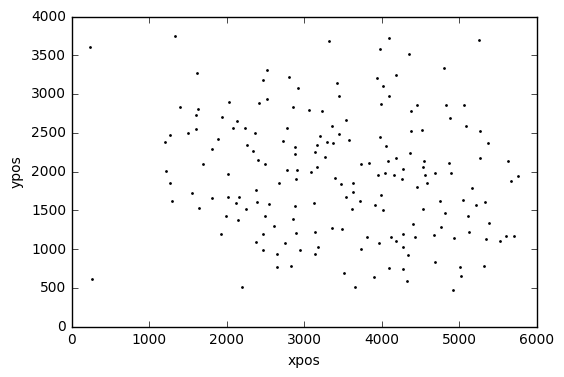

In [337]:
s00.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=1)

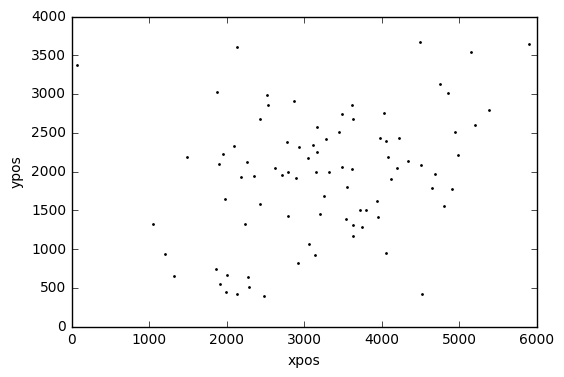

In [338]:
s10.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=1)

In [339]:
s10['dupf'] = s10.duplicated('id', keep=False)
s00['dupf'] = s00.duplicated('id', keep=False)
s10['dupl'] = s10.duplicated('id', keep=False)
s00['dupl'] = s00.duplicated('id', keep=False)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [340]:
def f(value):
    retval = 'k'
    if(value.dupf):
        retval = 'r'
    if(value.dupl):
        retval = 'r'
    
    return retval
    

In [341]:
s10['color'] = s10.apply(f, axis=1)
s00['color'] = s00.apply(f, axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


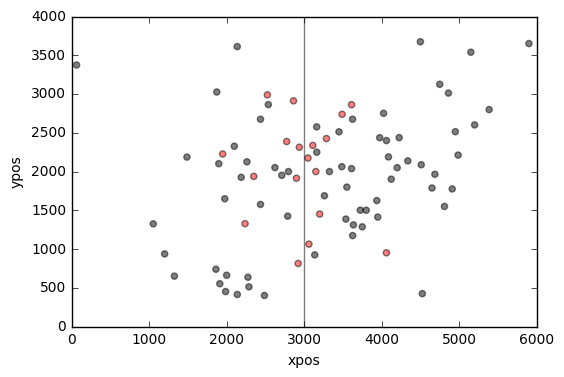

In [342]:
axes = s10.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=20, c=s10.color, alpha=0.5)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

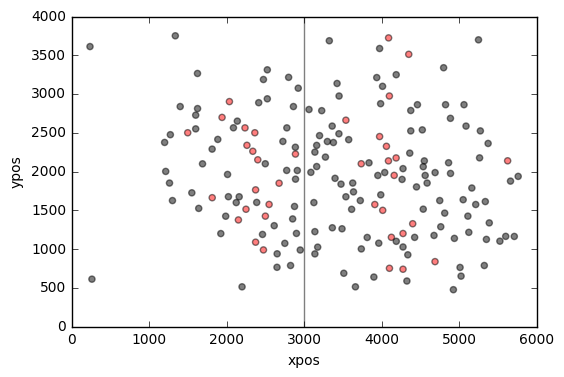

In [343]:
axes = s00.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=20, c=s10.color, alpha=0.5)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

In [324]:
s = DataFrame([1,2,3,4,5,1,2,3,1,2])

In [325]:
s['dup'] = s.duplicated(keep='last')

In [326]:
s

,0,dup
0,1,True
1,2,True
2,3,True
3,4,False
4,5,False
5,1,True
6,2,True
7,3,False
8,1,False
9,2,False


In [130]:
a = [3,4,5,6]
b = [100,200,300]

In [131]:
list(zip(a,b))

[(3, 100), (4, 200), (5, 300)]

In [132]:
import itertools

In [136]:
l = list(itertools.product(a,b))

In [169]:
d = {item:[] for item in l}

In [170]:
d

{(3, 100): [],
 (3, 200): [],
 (3, 300): [],
 (4, 100): [],
 (4, 200): [],
 (4, 300): [],
 (5, 100): [],
 (5, 200): [],
 (5, 300): [],
 (6, 100): [],
 (6, 200): [],
 (6, 300): []}

In [140]:
for i,j in l:
    print(i)

3
3
3
4
4
4
5
5
5
6
6
6


In [182]:
dd = {(1,1):[], (1,2):[], (1,3):[]}

In [183]:
results = [(1,1,[6,6,6]),(1,2,[1,2,3]),(1,3,[5,5,5]),(1,1,[2,2])]

In [184]:
for d,i,r in results:
    dd[(d,i)].extend(r)

In [185]:
dd

{(1, 1): [6, 6, 6, 2, 2], (1, 2): [1, 2, 3], (1, 3): [5, 5, 5]}

In [192]:
for i,d in dd:
    print(dd[(i,d)])

[6, 6, 6, 2, 2]
[1, 2, 3]
[5, 5, 5]
